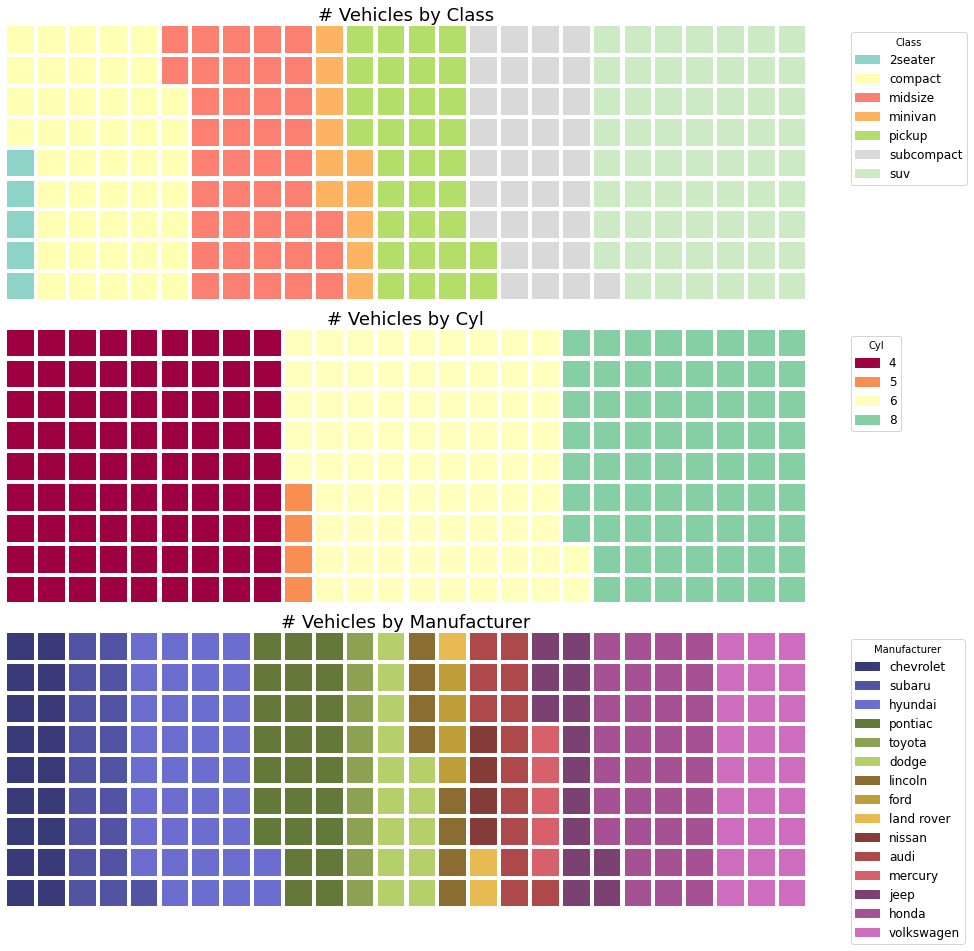

In [1]:
import pandas as pd
import seaborn as sns
import warnings;warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 
%matplotlib inline
from pywaffle import Waffle

#import dataset
df_raw = pd.read_csv('mpg_ggplot.csv')

#prepare data -by class
df_class = df_raw.groupby('class').size().reset_index(name='count_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

#prepare data -by Cylinder
df_cyl = df_raw.groupby('cyl').size().reset_index(name='count_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

#prepare data -by Cyl manufacturer
df_maker = df_raw.groupby('manufacturer').size().reset_index(name='count_maker')
n_categories = df_maker.shape[0]
colors_maker = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(FigureClass=Waffle, 
                plots= {
                    '311':{
                        'values':df_class['count_class'],
                        'labels':["{1}".format(n[0],n[1]) for n in df_class[['class','count_class']].itertuples()],
                        'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1),'fontsize':12,'title':'Class'},
                        'title':{'label':'# Vehicles by Class', 'loc':'center', 'fontsize':18},
                        'colors':colors_class
                    },
                    '312':{
                        'values':df_cyl['count_cyl'],
                        'labels':["{1}".format(n[0],n[1]) for n in df_cyl[['cyl','count_cyl']].itertuples()],
                        'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1), 'fontsize':12,'title':'Cyl'},
                        'title':{'label':'# Vehicles by Cyl', 'loc':'center','fontsize':18},
                        'colors':colors_cyl
                    },
                    '313':{
                        'values':df_maker['count_maker'],
                        'labels':{"{1}".format(n[0],n[1]) for n in df_maker[['manufacturer', 'count_maker']].itertuples()},
                        'legend':{'loc':'upper left', 'bbox_to_anchor':(1.05,1), 'fontsize':12,'title':'Manufacturer'},
                        'title':{'label':'# Vehicles by Manufacturer','loc':'center','fontsize':18},
                        'colors':colors_maker
                    },
                },
                
                rows=9,
                figsize=(16,14)
                )